# Forest Fire prediction using Machine Learning

### Importing libraries

In [72]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings(action='ignore')

### Loading the dataset

In [21]:
df = pd.read_csv('C:\\forestfires.csv')

In [23]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [33]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Exploratory Data Analysis

In [34]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [35]:
df.value_counts

<bound method DataFrame.value_counts of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

In [26]:
df.shape

(517, 13)

### checking the null values

In [28]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [29]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

### Dataset Visualization

##### a few visualizations(pairplot, heatmap, histogram) to understand the dataset and to understand how the temp is varying monthly by displot, boxplot, stripplot and lineplot

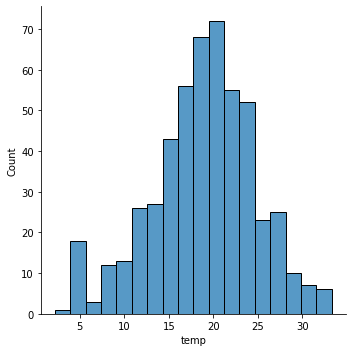

In [36]:
sns.displot(df.temp)

#### Correlation between the properties

<AxesSubplot:>

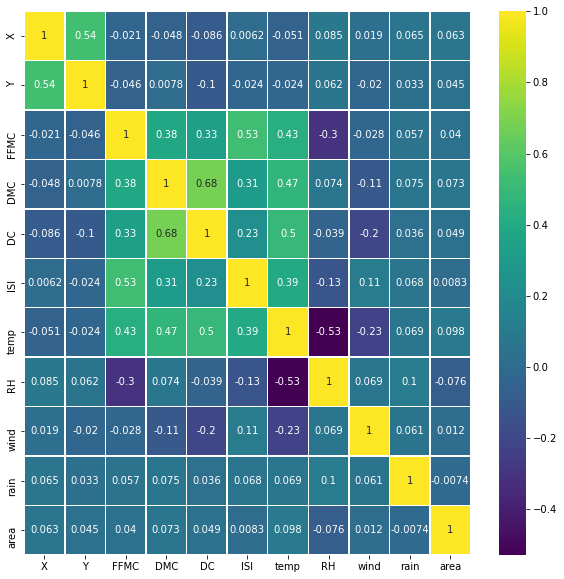

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

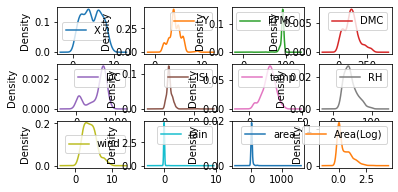

In [83]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

<AxesSubplot:xlabel='month', ylabel='temp'>

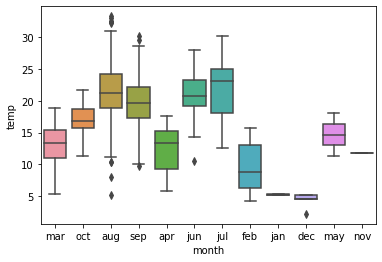

In [49]:
sns.boxplot(x='month',y='temp',data=df)

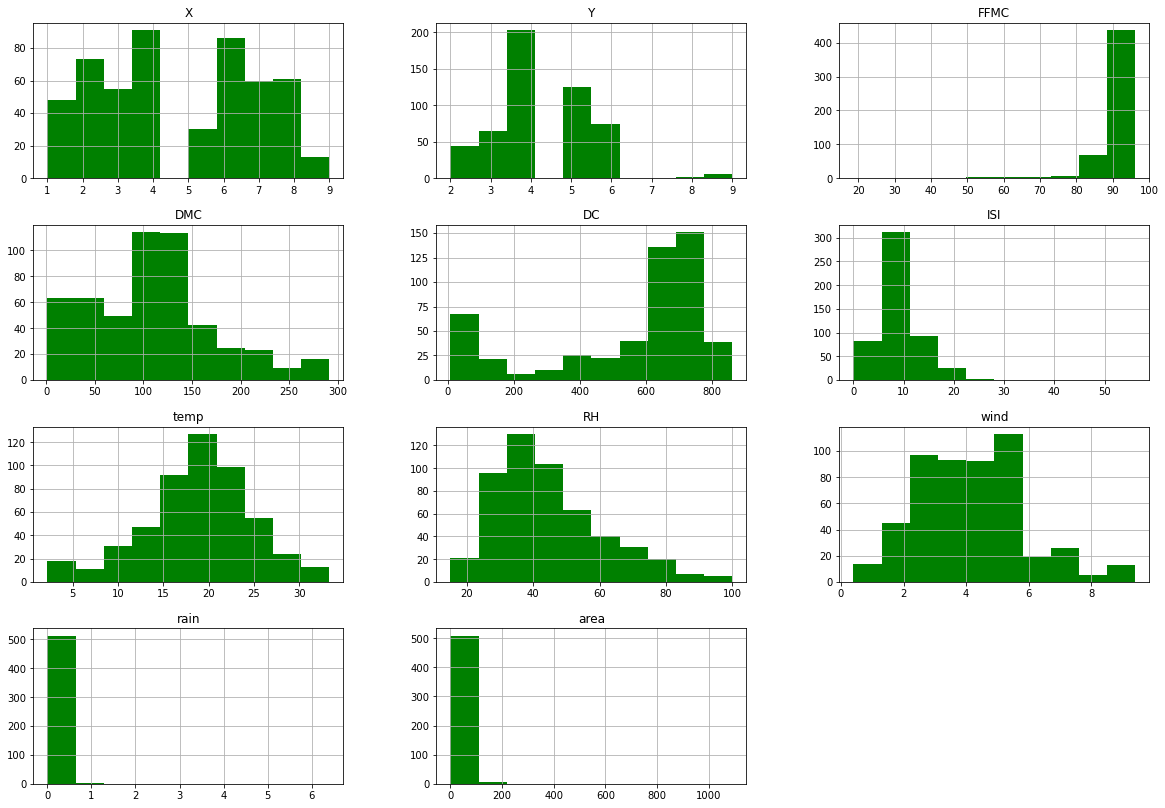

In [43]:
df.hist(figsize=(20,14),color='g')
plt.show()

<AxesSubplot:xlabel='month', ylabel='temp'>

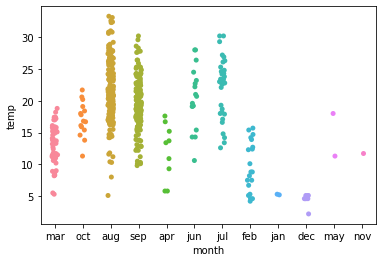

In [51]:
sns.stripplot(x='month',y='temp',data=df)

<AxesSubplot:xlabel='month', ylabel='temp'>

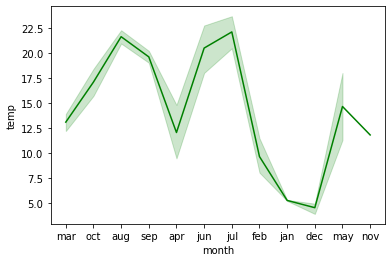

In [52]:
sns.lineplot(x='month',y='temp',data=df,color='g')

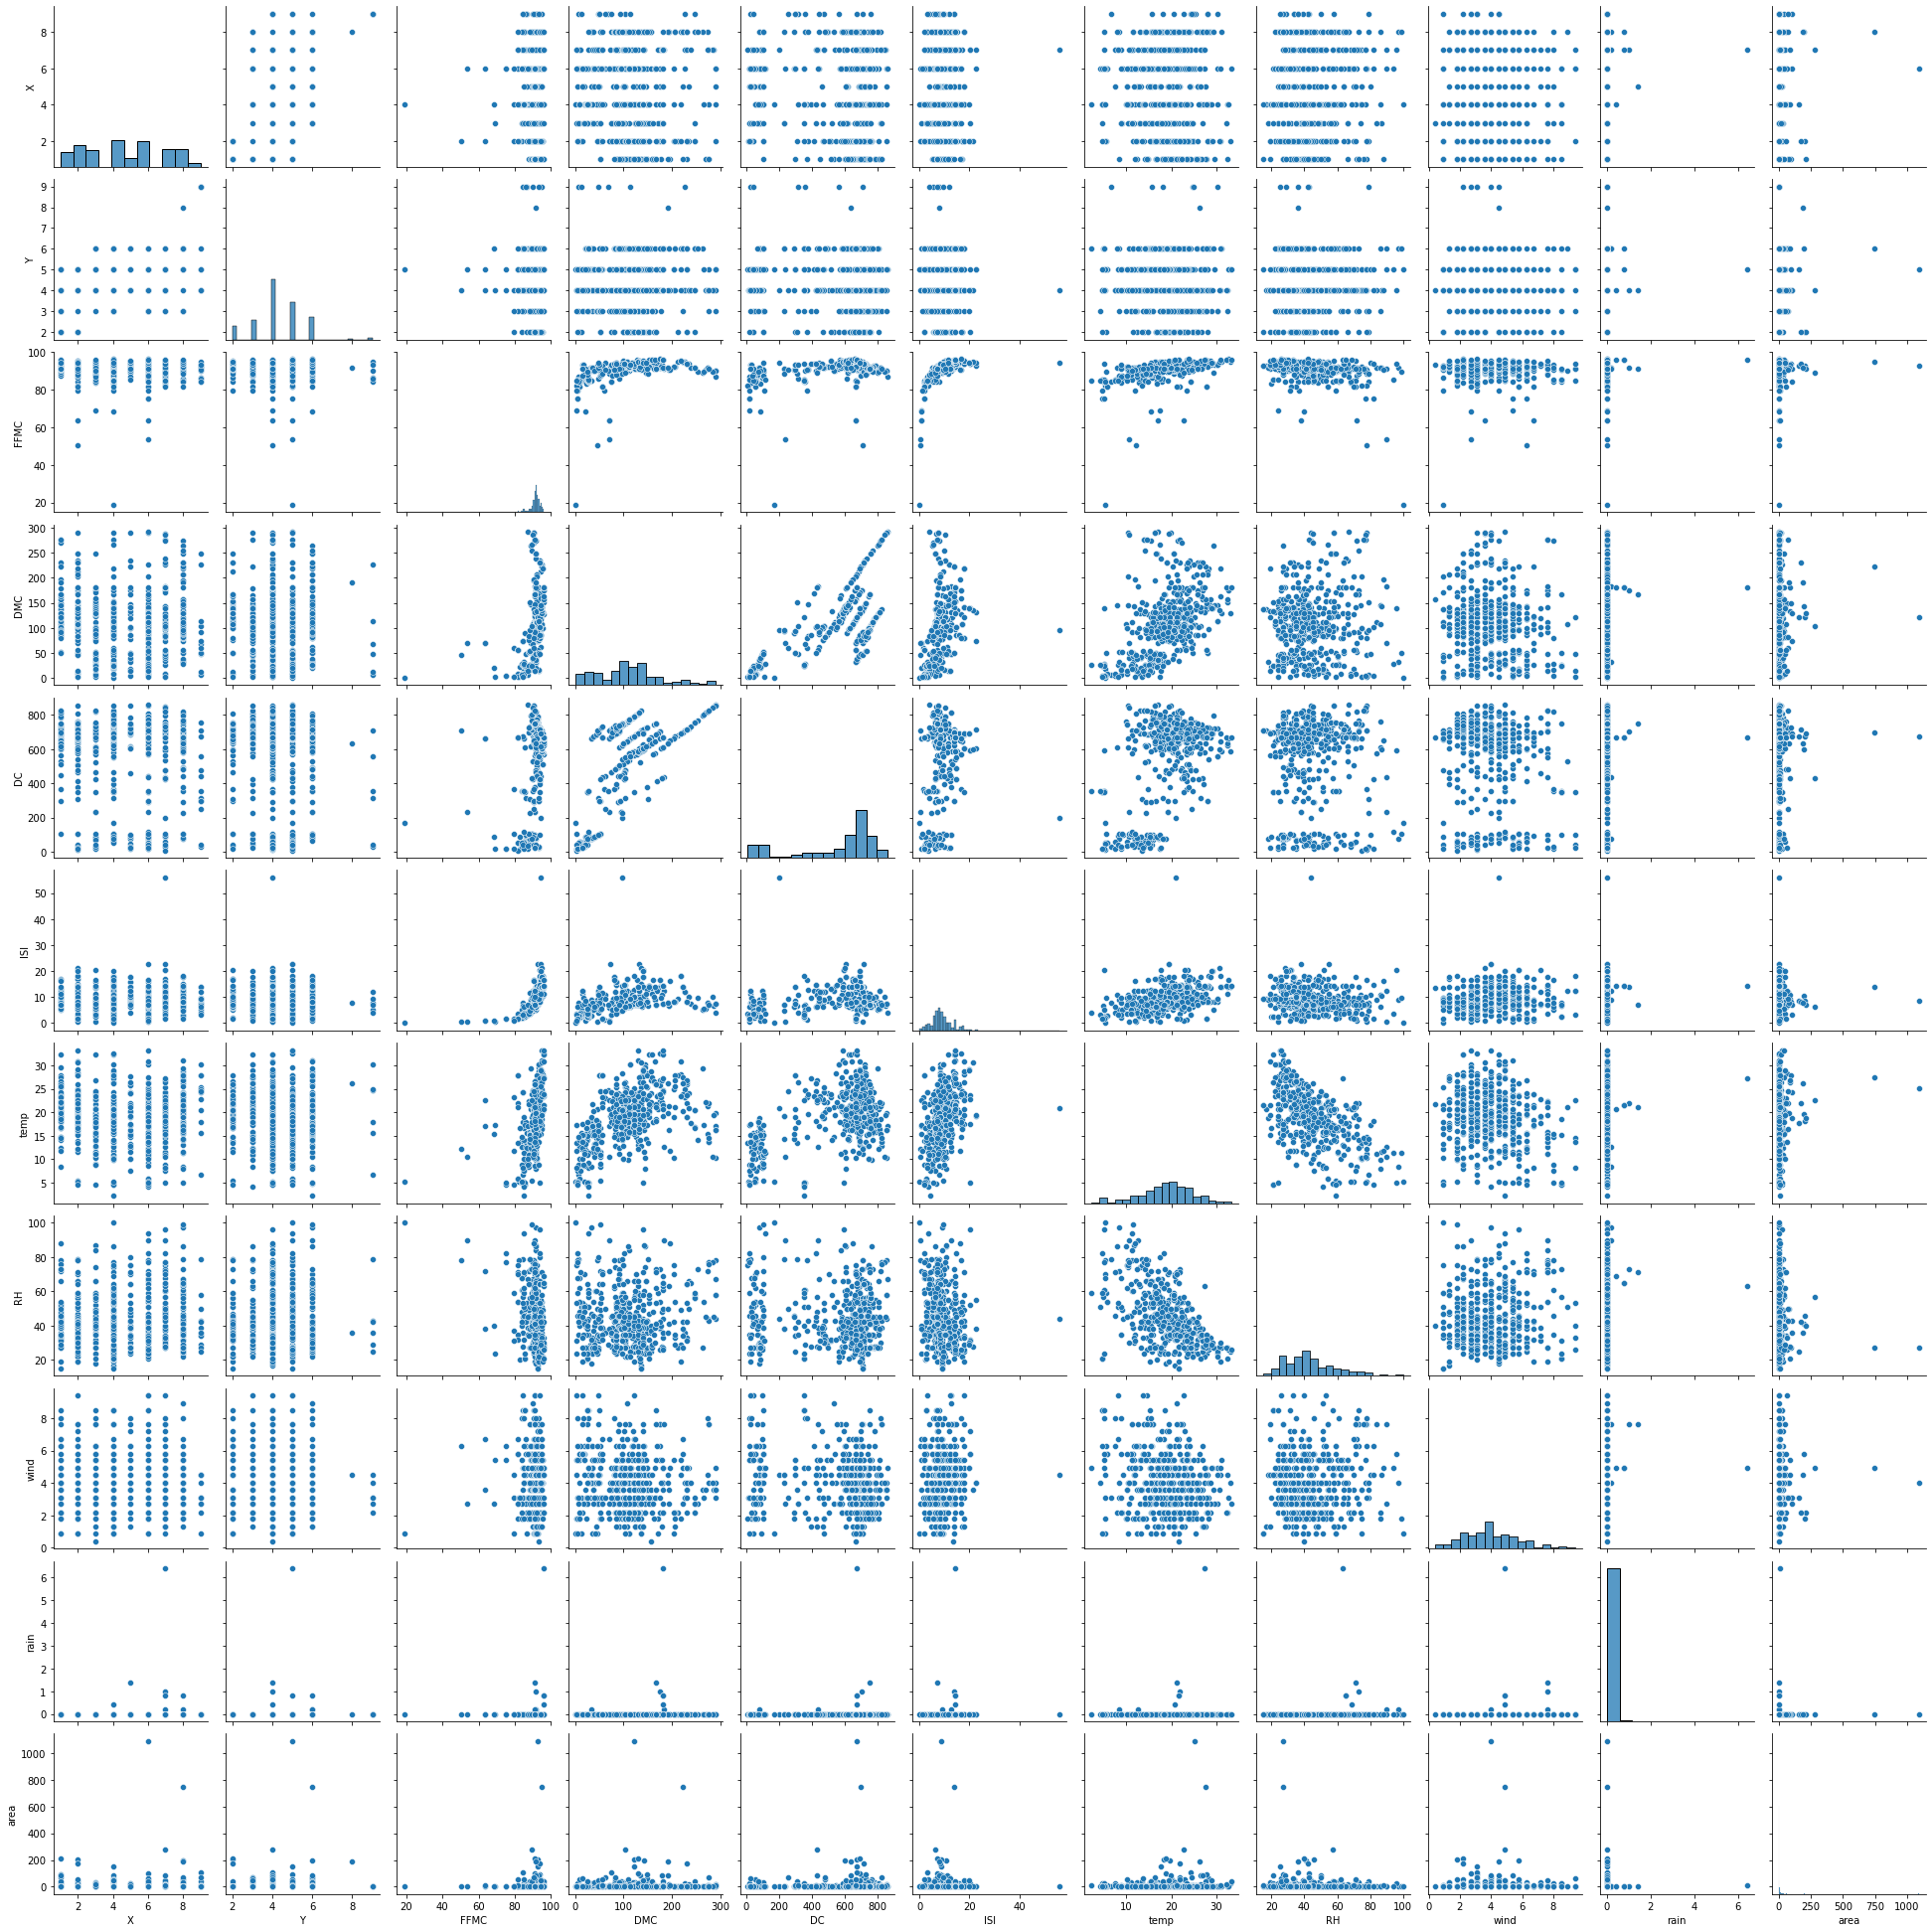

In [53]:
sns.pairplot(data=df)

#### Statistical Analysis of Dataset

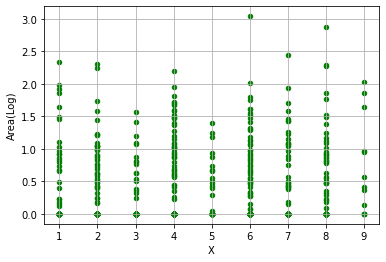

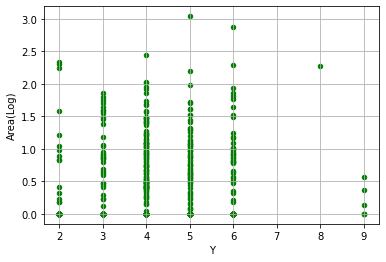

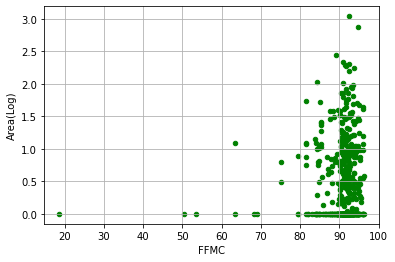

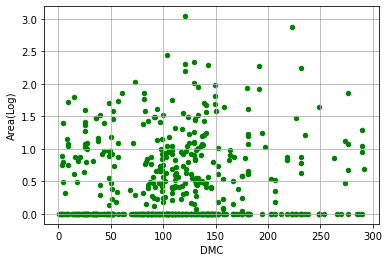

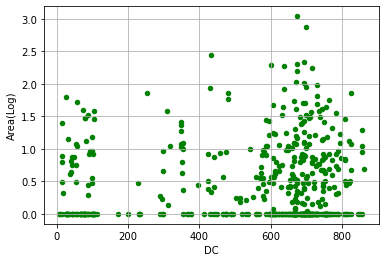

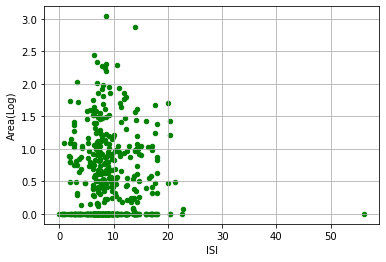

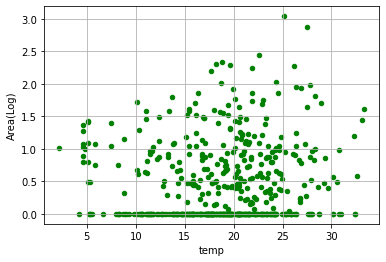

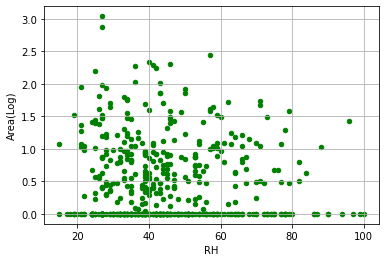

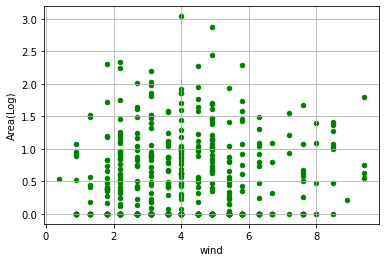

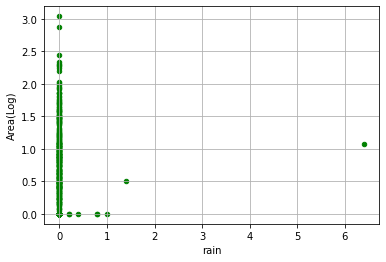

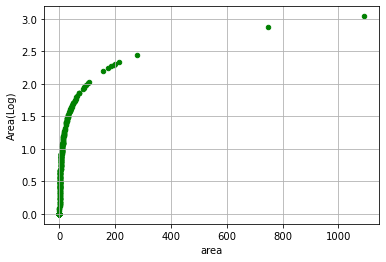

In [54]:
Area = df['area']
df['Area(Log)'] = np.log10(Area + 1)
for i in df.describe().columns[:-1]:
    df.plot.scatter(i,'Area(Log)',c='green',grid=True)

### Explore distribution of area values

Of the 500 values, more than 250 are between 0 and 1
About 150 are between 1 and 10
Let us try another histogram with those values removed


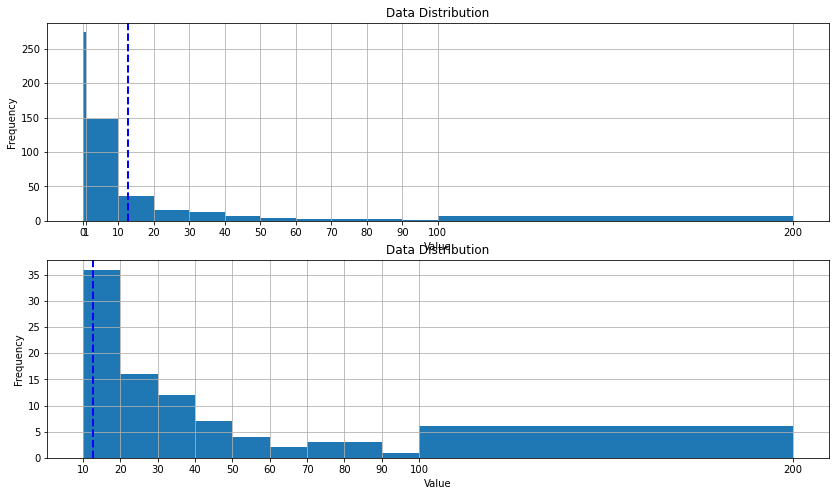

In [59]:
histdata = df['area']
meanVal = histdata.mean()
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.hist(histdata, bins=[0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.axvline(x=meanVal, color = 'blue', linestyle='dashed', linewidth = 2)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.xticks(ticks=[0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.ylabel('Frequency')
plt.grid(True)
print('Of the 500 values, more than 250 are between 0 and 1')
print('About 150 are between 1 and 10')
print('Let us try another histogram with those values removed')
plt.subplot(2,1,2)
plt.hist(histdata, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.axvline(x=meanVal, color = 'blue', linestyle='dashed', linewidth = 2)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.xticks(ticks=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### The burn area values are really skewed

In [63]:
print('The number of records with zero burnt area is:  {}'
      .format(len(df[df['area'] == 0])))
print('The number of records with non zero burnt area is:  {}'
      .format(len(df[df['area'] != 0])))
print("The number of records with burnt area between 0 and 1 hectares is:  {}"
      .format(len(df.loc[(df['area'] > 0) & (df['area'] <= 1)])))
limits = [50, 100, 500, 1000]
for each in limits:    
    print('Burnt area more than {} hectares is:  {}'
          .format(each, len(df[df['area'] > each])))

The number of records with zero burnt area is:  247
The number of records with non zero burnt area is:  270
The number of records with burnt area between 0 and 1 hectares is:  27
Burnt area more than 50 hectares is:  24
Burnt area more than 100 hectares is:  11
Burnt area more than 500 hectares is:  2
Burnt area more than 1000 hectares is:  1


### Train/Test the values of Datasets

In [73]:
X, Y = df[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']], df[['area']]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.20, random_state=9892)
print ('Training Set: {} rows\n\nTest Set: {} rows'.format(XTrain.shape[0], XTest.shape[0]))

Training Set: 413 rows

Test Set: 104 rows


### Model Evaluation

#### Predictions

##### Regression metrics (MAE, RMSE, r2)

In [74]:
def regressionResults(YTrue, predictions):
    MAE=metrics.mean_absolute_error(YTrue, predictions) 
    RMSE=metrics.mean_squared_error(YTrue, predictions, squared=False) 
    r2=metrics.r2_score(YTrue, predictions)
    print('\nR Squared: ', round(r2,4))
    print('\nMAE: ', round(MAE,4))
    print('\nRMSE: ', round(RMSE,4))

##### Residuals

In [80]:
def residualPlots(YTrue, predictions):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.residplot(x = predictions, y = YTrue, lowess = True, line_kws={'color':'red'})
    plt.xlabel('Fitted Values')
    plt.title('Residual Plot')
    plt.subplot(2,2,2)
    residuals = YTrue - predictions
    scipy.stats.probplot(residuals.reshape(-1), dist="norm", plot=plt)   
    plt.subplot(2,2,3)
    plt.scatter(YTrue, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.show()

### Regression Models

#### Linear Regression


R Squared:  0.0275

MAE:  20.4458

RMSE:  72.567


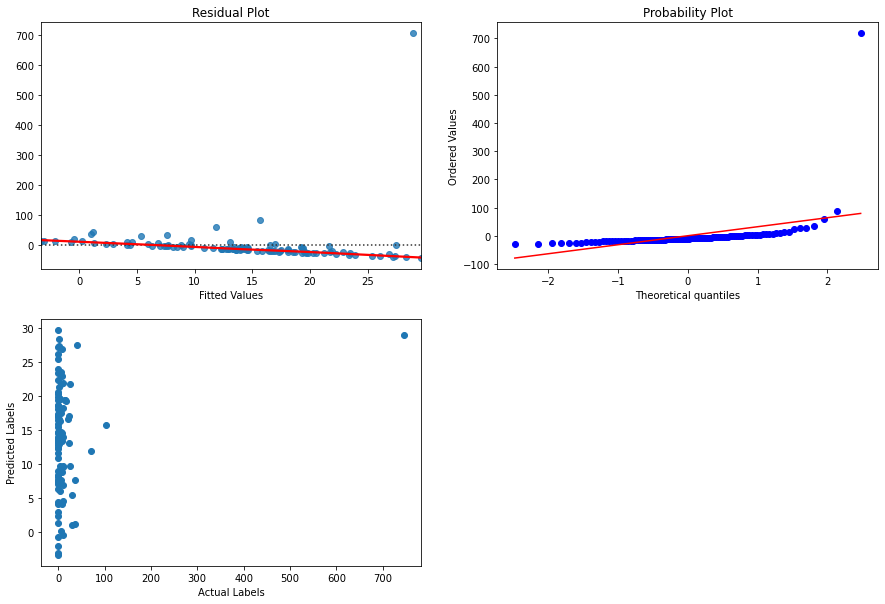

In [78]:
Model_LinearRegression = None
Model_LinearRegression = LinearRegression()

Model_LinearRegression.fit(X=XTrain, y=YTrain)

predictions = None
predictions = Model_LinearRegression.predict(XTest)

regressionResults(YTest.values, predictions)
residualPlots(YTest.values, predictions)